# Programming Assignment #4
**ECE BOARD EXAM PROBLEM:** Using data wrangling and data visualization technique with
storytelling, analyze the data and present different (i) data frames; and (ii) visuals using the dataset given.

In [422]:
# Imports the pandas library with an alias pd
import pandas as pd
# Imports the matplotlib.pyplot library with an alias plt
import matplotlib.pyplot as plt
# Imports the seaborn library with an alias sns
import seaborn as sns

#Uses .read_excel() function to read 'board2.xlsx' and store it to board variable
board = pd.read_excel('board2.xlsx')
#outputs board
board

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


## 1. Data filtering
#### a. Filename: Instru = [“Name”, “GEAS”, “Electronics >70”]; where track is constant as Instrumentation and hometown Luzon.

In [374]:
#Suggestion: make the function more dynamic to make it more reusable. This function was made just for this problem.

# Defines ComplexQuery() function that accepts df, Hometown, columns, Track = None, Gender = None as parameters
# Track = None to allow the user to input empty Track variable value
# Gender = None to allow the user to input empty Gender variable value
def ComplexQuery(df, Hometown, columns, Track = None, Gender = None):

    # If the user did not enter a value for Track, it will return a datafram that filters the Hometown and Gender and sets the columns based on the userinput
    if Track == None:
        return df.loc[(df['Hometown'] == Hometown) & (df['Gender'] == Gender), columns]
    # If the user did not enter a value for gender, it will return a dataframe that filters Electronics, Hometown, Track, and sets the columns based on the userinput 
    # It will only filter the electronics key that is less than 70. It will only output if the students grade in electronics is greater than 70
    elif Gender == None:
        return df.loc[(df['Electronics'] > 70) &(df['Hometown'] == Hometown) & (df['Track'] == Track),columns]
    # It will combine the first two return and return it. This is set as a default return so when the user did not meet the first two conditions, it will return this.
    else:
        return df.loc[(df['Electronics'] > 70) & (df['Hometown'] == Hometown) & (df['Track'] == Track) & (df['Gender'] == Gender),columns]
# Calls the ComplexQuery() function 
Instru = ComplexQuery(board, 'Luzon', ['Name','GEAS','Electronics'], 'Instrumentation', None)

Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81



#### GWA of every students stored in a indexed dataframe

In [417]:
# defines a GWA() function with df and sub as parameters
# df and sub parameter is there to make the code reusable for any dataframe
def GWA(df, sub):
    # Returns the average of the sub in the dateframe
    return df[sub].mean(axis=1)
# Calls GWA() to output the mean grade of all students in the inputted subjects
GWA(board, ['Math', 'Electronics', 'GEAS', 'Communication'])

0     75.00
1     67.25
2     72.75
3     70.50
4     69.00
5     75.50
6     58.50
7     61.75
8     47.75
9     67.25
10    54.75
11    76.00
12    62.25
13    80.50
14    59.00
15    77.25
16    70.50
17    63.50
18    73.00
19    66.50
20    68.50
21    62.50
22    68.75
23    57.75
24    75.25
25    65.75
26    60.75
27    67.75
28    63.50
29    68.00
dtype: float64

#### b. Filename: Mindy = [ “Name”, “Track”, “Electronics”, “Average >=55”]; where hometown is constant as **Mindanao** and gender **Female**


In [411]:
# Calls ComplexQuery() function and sets Mindanao & Female as its constant. 
# Set the filtered dataframe to variable Mindy
Mindy = ComplexQuery(board, 'Mindanao', ['Name','Track','Electronics'], None, 'Female') 
# Adds a new column named 'Average' in Mindy dataframe
# Calls the GWA() function to set the values of the key column of the Dataframe
# Mindy[] to concat the filtered dataframe and the new 'Average' column
Mindy['Average'] = GWA(board, ['Math', 'Electronics', 'GEAS', 'Communication']) 
# Filters the average column to only output those who received greater than or equal to 55 average
Mindy[Mindy['Average'] >= 55]

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


## 2. Data Visualization
#### Create a visualization that shows how the different features contributes to average grade. Does chosen track in college, gender, or hometown contributes to a higher average score?


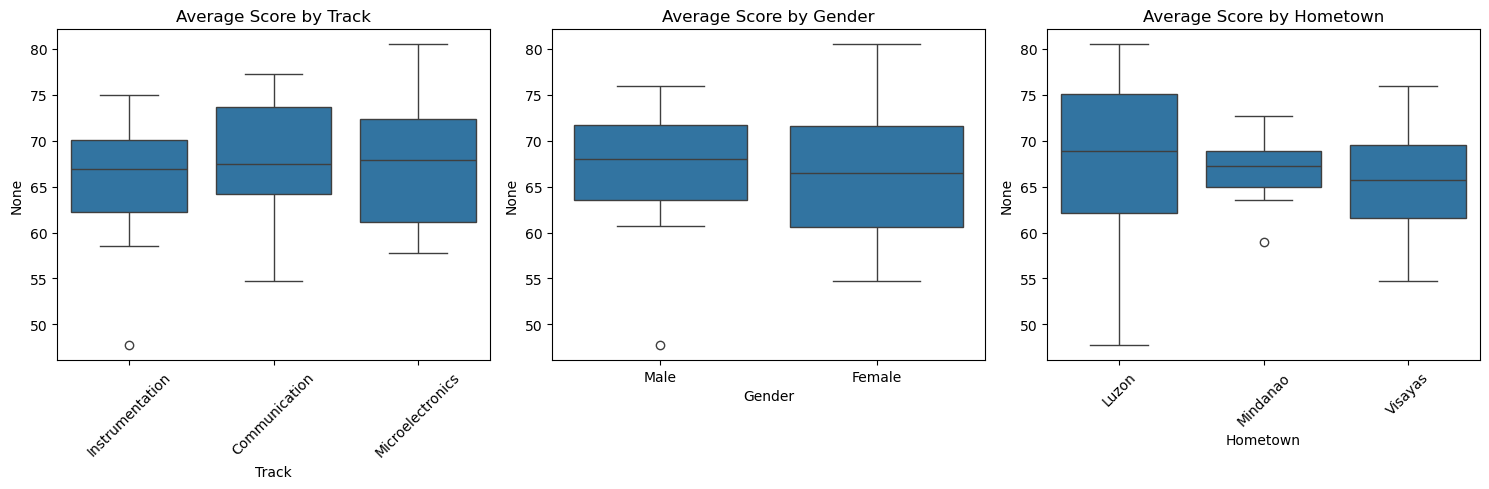

In [419]:
GWA1 = GWA(board, ['Math', 'Electronics', 'GEAS', 'Communication'])

# Sets the figure size for the overall plot
plt.figure(figsize=(15, 5))

# Boxplot for Track
# Creates the first subplot in a 1x3 grid
plt.subplot(1, 3, 1)
# Creates a boxplot with 'Track' on x-axis and GWA1 on y-axis
sns.boxplot(x='Track', y=GWA1, data=board)
# Sets the title for the first boxplot
plt.title('Average Score by Track')
# Rotates the x-axis labels by 45 degrees for readability
plt.xticks(rotation=45)

# Boxplot for Gender
plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y=GWA1, data=board)
plt.title('Average Score by Gender')

# Boxplot for Hometown
plt.subplot(1, 3, 3)
sns.boxplot(x='Hometown', y=GWA1, data=board)
plt.title('Average Score by Hometown')
plt.xticks(rotation=45)

# Adjusts the layout so the plots don't overlap and fits the figure properly
plt.tight_layout()

# Displays the plot
plt.show()